In [1]:
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('iris.txt')

In [3]:
data.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width',
       'Iris plant'],
      dtype='object')

In [4]:
X = data[data.columns[:-1]].values
Y = LabelEncoder().fit_transform(data['Iris plant'].values)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, shuffle=True, random_state=65, train_size=0.7)

In [6]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [7]:
train_loader = DataLoader(TensorDataset(torch.tensor(x_train), torch.tensor(y_train)), batch_size=6)
test_loader = DataLoader(TensorDataset(torch.tensor(x_test), torch.tensor(y_test)), batch_size=6)

In [8]:
lr=0.02
model = nn.Sequential(
      nn.Linear(4,20),
      nn.Linear(20,10),
      nn.Linear(10,3)
)
optim = torch.optim.AdamW(model.parameters(), lr=0.02)

In [9]:
epochs = 100
loss_list = []
f1_scores = []
for i in range(epochs):
    # eval model on the test data
    test_preds = []
    test_truth = []
    # store classification labels (pred and actual)
    y_preds = []
    y_truth = []

    for train in train_loader:
        pred = model(train[0].float())
        loss = torch.nn.functional.cross_entropy(pred, train[1].long())
        loss.backward()
        optim.step()
        optim.zero_grad()
        print(loss.item())
        loss_list.append(loss.item())

    for test in test_loader:
        pred = torch.argmax(model(test[0].float()), dim=-1)
        test_preds.extend(pred.detach().numpy())
        test_truth.extend(test[1].detach().numpy())
        y_preds.extend(pred.detach().numpy())
        y_truth.extend(test[1].detach().numpy())

    # model.eval()
    f1 = f1_score(y_truth, y_preds, average='macro')
    f1_scores.append(f1)
    # model.train()

1.510046124458313
1.0680168867111206
1.1287108659744263
0.9233145713806152
1.0033824443817139
0.9598191380500793
0.8839130997657776
0.7423882484436035
0.556109607219696
0.7862722873687744
0.6373529434204102
0.5825260281562805
0.38858547806739807
0.5116012692451477
0.40171781182289124
0.3509654104709625
0.23984430730342865
0.5515701174736023
0.5897058248519897
0.577407956123352
0.30622008442878723
0.4032019078731537
0.39445003867149353
0.31627336144447327
0.3011416494846344
0.5248573422431946
0.21944302320480347
0.20252002775669098
0.3548215925693512
0.41072985529899597
0.17534060776233673
0.30111780762672424
0.1758849173784256
0.3407273292541504
0.07851701229810715
0.2162916213274002
0.4166477620601654
0.1688697785139084
0.18982107937335968
0.16841499507427216
0.20396198332309723
0.11994537711143494
0.06150563433766365
0.06690605729818344
0.21895702183246613
0.04047974944114685
0.18750250339508057
0.14038623869419098
0.05020803213119507
0.04557625576853752
0.32169482111930847
0.1602442

In [10]:
print(classification_report(test_truth, test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.79      0.88        14
           2       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [11]:
epochs_list=[]
epochs_list = list(range(1,len(loss_list)+1))
len(epochs_list)

1800

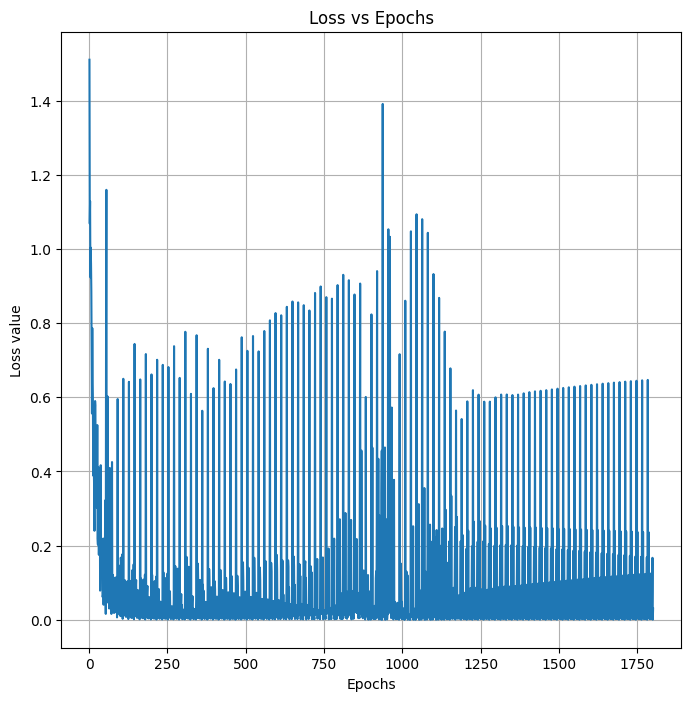

In [13]:
plt.figure(figsize=(8, 8))
plt.plot(epochs_list, loss_list)
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.grid(True)
plt.show()